In [19]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score



In [5]:
#Loading mnist datset from keras
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


5


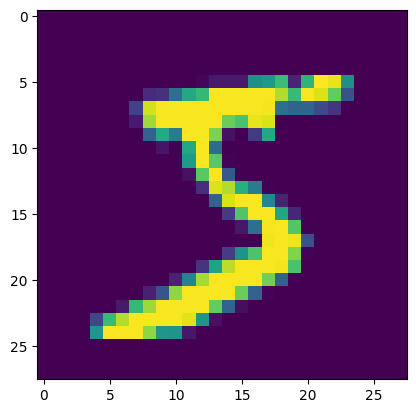

In [6]:
print(y_train[0])
plt.imshow(x_train[0])

**Pre-processing**

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
IMG_SIZE=28
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_test=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [8]:
print("Training data dimension: ", x_train.shape)
print("Testing data dimension: ", x_test.shape)

Training data dimension:  (60000, 28, 28, 1)
Testing data dimension:  (10000, 28, 28, 1)


In [9]:
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


# **Building CNN model**

In [10]:
#creating a neural network
model=Sequential()

#First Convolution Layer
model.add(Conv2D(64, (5,5), input_shape=x_train.shape[1:])) #only for first convolution layer to mention input size
model.add(Activation("relu")) #activation function to make it non-linera, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2x2


#2nd Convolution Layer
model.add(Conv2D(64, (5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected Layer 1
model.add(Flatten())#before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))


#fully connected Layer 2
model.add(Dense(10))
model.add(Activation("softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,378 (665.54 KB)

 Trainable params: 170,378 (665.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
score=model.fit(x_train,y_train,epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8813 - loss: 0.3905 - val_accuracy: 0.9778 - val_loss: 0.0828
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9807 - loss: 0.0645 - val_accuracy: 0.9841 - val_loss: 0.0525
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9861 - val_loss: 0.0498
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9911 - loss: 0.0258 - val_accuracy: 0.9847 - val_loss: 0.0540
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9883 - val_loss: 0.0447
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9857 - val_loss: 0.0518
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9868 - val_loss: 0.0536
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9972 - loss: 0.0082

In [14]:
prediction=model.predict([x_train])

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


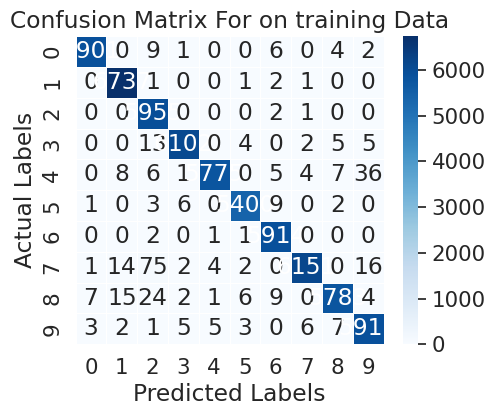

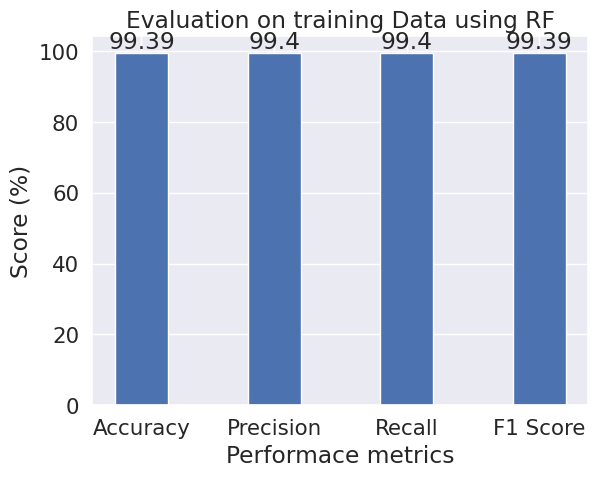

Accuracy: 99.39%
Precision: 99.4%
Recall: 99.4%
F1 Score: 99.39%


In [28]:
train_pred=[]
for i in range(0,len(prediction)):
  t=np.argmax(prediction[i])
  train_pred.append(t)


acc=round(accuracy_score(y_train,train_pred),4)*100
pre=round(precision_score(y_train,train_pred, average='macro'),4)*100
rec=round(precision_score(y_train,train_pred,average='macro'),4)*100
f1=round(f1_score(y_train,train_pred,average='macro'),4)*100

cm = confusion_matrix(y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For on training Data')

plt.show()

print()
print()
print()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [acc, pre, rec,f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using RF")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {acc}%')
print(f'Precision: {pre}%')
print(f'Recall: {rec}%')
print(f'F1 Score: {f1}%')
